## Outlier removal using IQR

### On a single column dataset

In [ ]:
import pandas as pd

# --- Example dataset ---
# Imagine these are exam scores out of 100
data = {'scores': [55, 58, 60, 62, 65, 67, 68, 70, 72, 75, 78, 80, 150]}
df = pd.DataFrame(data)
print("Original data:")
print(df)

# --- Step 1: Compute the 1st and 3rd quartiles (Q1 and Q3) ---
Q1 = df['scores'].quantile(0.25)
Q3 = df['scores'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# --- Step 2: Define bounds for non-outliers ---
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nQ1 =", Q1, ", Q3 =", Q3, ", IQR =", IQR)
print("Lower bound:", lower_bound, "Upper bound:", upper_bound)

# --- Step 3: Filter out outliers ---
filtered_df = df[(df['scores'] >= lower_bound) & (df['scores'] <= upper_bound)]

print("\nData after removing outliers:")
print(filtered_df)

### On a multicolumn dataset

In [ ]:
# Example multi-column dataset
data = {
    'height_cm': [160, 162, 165, 170, 172, 175, 178, 300],
    'weight_kg': [55, 58, 60, 62, 64, 65, 68, 200]
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Function to remove outliers using IQR for each column
def remove_outliers_iqr(df):
    filtered_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Keep only rows where this column is within bounds
        filtered_df = filtered_df[(filtered_df[col] >= lower) & (filtered_df[col] <= upper)]
    return filtered_df

clean_df = remove_outliers_iqr(df)
print("\nAfter removing outliers (per column):")
print(clean_df)

## K-means with analysis

K-Means Clustering Evaluation:
   k      inertia  silhouette
0  2  9051.816245    0.615485
1  3  1773.736866    0.799280
2  4   203.890747    0.875647
3  5   185.213487    0.731072
4  6   166.735174    0.585323
5  7   148.257132    0.451666
6  8   130.897604    0.329560
7  9   117.921916    0.337884


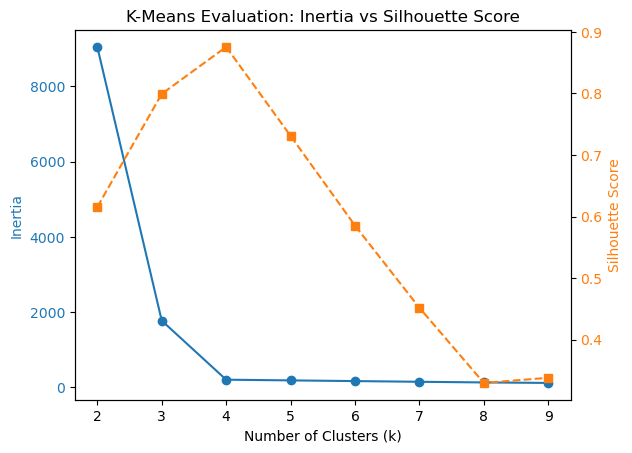

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- Step 1: Generate a small synthetic dataset ---
# make_blobs creates sample data with known cluster structure
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# --- Step 2: Try different k values and collect metrics ---
results = []
k_values = range(2, 10)  # test k = 2 through 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    inertia = kmeans.inertia_  # measure of compactness (lower is better)
    silhouette = silhouette_score(X, kmeans.labels_)  # measure of separation (higher is better)
    
    results.append({'k': k, 'inertia': inertia, 'silhouette': silhouette})

# Convert to DataFrame for neat viewing
results_df = pd.DataFrame(results)

# --- Step 3: Print results ---
print("K-Means Clustering Evaluation:")
print(results_df)

# --- Step 4: Plot the metrics for visualization ---
fig, ax1 = plt.subplots()

ax1.plot(results_df['k'], results_df['inertia'], 'o-', label='Inertia', color='tab:blue')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # share the same x-axis
ax2.plot(results_df['k'], results_df['silhouette'], 's--', label='Silhouette', color='tab:orange')
ax2.set_ylabel('Silhouette Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("K-Means Evaluation: Inertia vs Silhouette Score")
plt.show()
